<a href="https://colab.research.google.com/github/PreamJ/BrainCodeCamp/blob/main/SleepStageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 44.0 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade yasa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 39.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 423.6/423.6 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.1/48.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.8 MB/s eta 0:00:00
  Cre

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import mne
raw = mne.io.read_raw_edf('/content/drive/MyDrive/Sleeping/recordings/SN001.edf', preload=True)
raw

Extracting EDF parameters from /content/drive/MyDrive/Sleeping/recordings/SN001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 6566399  =      0.000 ... 25649.996 secs...


<RawEDF | SN001.edf, 8 x 6566400 (25650.0 s), ~400.8 MB, data loaded>

In [ ]:
print(raw.ch_names)

['EEG F4-M1', 'EEG C4-M1', 'EEG O2-M1', 'EEG C3-M2', 'EMG chin', 'EOG E1-M2', 'EOG E2-M2', 'ECG']


In [ ]:
raw.drop_channels(['EMG chin', 'EOG E1-M2', 'EOG E2-M2', 'ECG'])
chan = raw.ch_names
print(chan)

['EEG F4-M1', 'EEG C4-M1', 'EEG O2-M1', 'EEG C3-M2']


In [ ]:
print(raw.info['sfreq'])

256.0


In [ ]:
raw.resample(100)
sf = raw.info['sfreq']
sf

100.0

In [ ]:
raw.filter(0.3, 45)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 s)



<RawEDF | SN001.edf, 4 x 2565000 (25650.0 s), ~78.3 MB, data loaded>

In [ ]:
data = raw.get_data(units="uV")
print(data.shape)

(4, 2565000)


In [ ]:
import pandas as pd
hypno = pd.read_csv("/content/drive/MyDrive/Sleeping/recordings/SN001_sleepscoring.txt", squeeze=True)


<ipython-input-11-a1024cb927ef>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  hypno = pd.read_csv("/content/drive/MyDrive/Sleeping/recordings/SN001_sleepscoring.txt", squeeze=True)


In [ ]:
hypno1 = hypno.iloc[:, 4]
hypno1

0       Sleep stage W
1       Sleep stage W
2          Lights off
3       Sleep stage W
4       Sleep stage W
            ...      
851     Sleep stage W
852     Sleep stage W
853     Sleep stage W
854     Sleep stage W
855         Lights on
Name:  Annotation, Length: 856, dtype: object

In [ ]:
hypno2 = []
for i in hypno1:
  if(i==' Sleep stage W'):
    hypno2.append(0)
  elif(i==' Sleep stage N1'):
    hypno2.append(1)
  elif(i==' Sleep stage N2'):
    hypno2.append(2)
  elif(i==' Sleep stage N3'):
    hypno2.append(3)
  elif(i==' Sleep stage R'):
    hypno2.append(4)
  else: hypno2.append(-2)
# hypno2 = pd.DataFrame(hypno2)
# hypno2

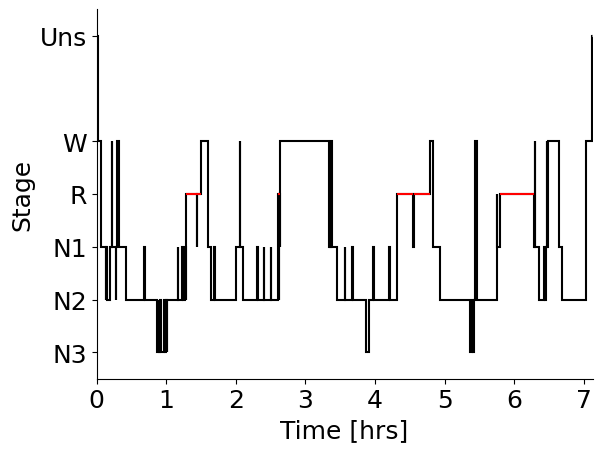

In [ ]:
import yasa
yasa.plot_hypnogram(hypno2);

In [ ]:
yasa.sleep_statistics(hypno2, sf_hyp=1/30) #sf_hyp is recorded every 30 sec -> 30 Hz

{'TIB': 428.0,
 'SPT': 418.0,
 'WASO': 66.5,
 'TST': 351.5,
 'N1': 54.5,
 'N2': 215.0,
 'N3': 11.5,
 'REM': 70.5,
 'NREM': 281.0,
 'SOL': 4.5,
 'Lat_N1': 4.5,
 'Lat_N2': 8.5,
 'Lat_N3': 53.0,
 'Lat_REM': 78.0,
 '%N1': 15.5049786628734,
 '%N2': 61.16642958748222,
 '%N3': 3.271692745376956,
 '%REM': 20.056899004267425,
 '%NREM': 79.94310099573258,
 'SE': 82.12616822429906,
 'SME': 84.0909090909091}

In [ ]:
counts, probs = yasa.transition_matrix(hypno2)
probs.round(3)

To Stage,-2,0,1,2,3,4
From Stage,,,,,,
-2,0.000,1.000,0.000,0.000,0.000,0.000
0,0.013,0.901,0.086,0.000,0.000,0.000
1,0.000,0.083,0.670,0.220,0.000,0.028
2,0.000,0.005,0.042,0.923,0.019,0.012
3,0.000,0.000,0.000,0.348,0.652,0.000
4,0.000,0.014,0.035,0.007,0.000,0.943


In [ ]:
import numpy as np
np.diag(probs.loc[2:, 2:]).mean().round(3)

0.84

In [ ]:
hypno_up = yasa.hypno_upsample_to_data(hypno2, sf_hypno=1/30, data=raw)
print(len(hypno_up))

2565000


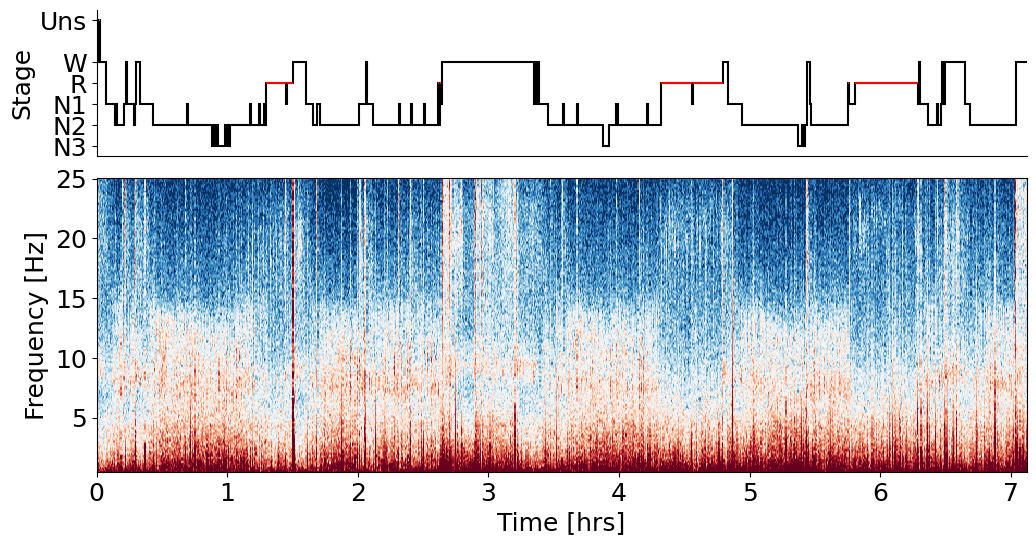

In [ ]:
# ['EEG F4-M1', 'EEG C4-M1', 'EEG O2-M1', 'EEG C3-M2']
yasa.plot_spectrogram(data[chan.index("EEG F4-M1")], sf, hypno_up);

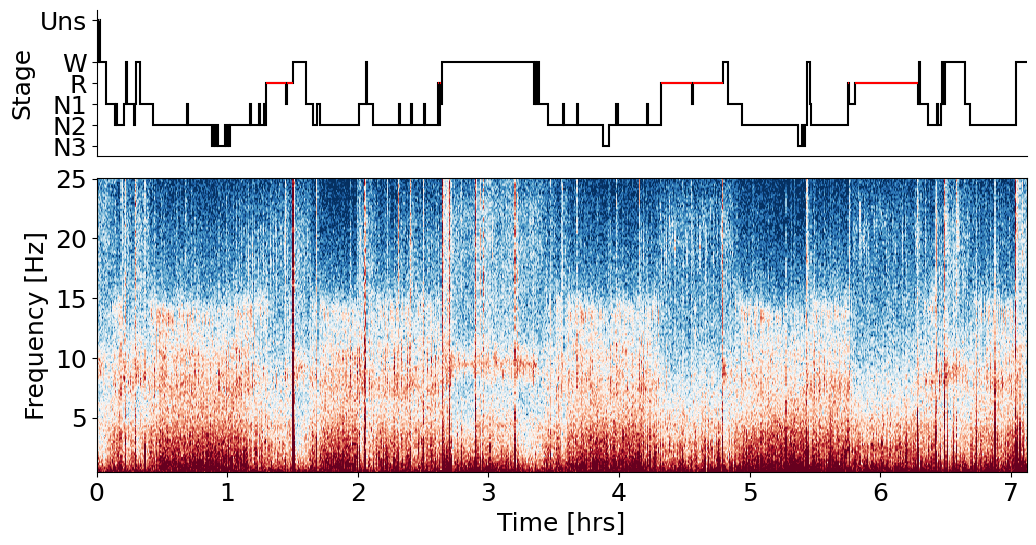

In [ ]:
# ['EEG F4-M1', 'EEG C4-M1', 'EEG O2-M1', 'EEG C3-M2']
yasa.plot_spectrogram(data[chan.index("EEG C4-M1")], sf, hypno_up);

In [ ]:
yasa.bandpower(raw)

,Delta,Theta,Alpha,Sigma,Beta,Gamma,TotalAbsPow,FreqRes,Relative
Chan,,,,,,,,,
EEG F4-M1,0.753016,0.115520,0.067026,0.029862,0.030099,0.004476,141.649727,0.25,True
EEG C4-M1,0.678864,0.148338,0.089762,0.040867,0.037117,0.005051,91.792231,0.25,True
EEG O2-M1,0.716019,0.125976,0.072915,0.038143,0.039978,0.006970,82.225965,0.25,True
EEG C3-M2,0.698738,0.140163,0.083912,0.037986,0.034138,0.005063,87.296400,0.25,True


In [ ]:
yasa.bandpower(raw, relative=False, bands=[(1, 9, "Slow"), (9, 30, "Fast")])

,Slow,Fast,TotalAbsPow,FreqRes,Relative
Chan,,,,,
EEG F4-M1,74.625795,14.760205,89.386000,0.25,False
EEG C4-M1,52.716863,12.628604,65.345468,0.25,False
EEG O2-M1,42.026487,10.408922,52.435410,0.25,False
EEG C3-M2,49.042137,11.200443,60.242580,0.25,False


In [ ]:
bandpower = yasa.bandpower(raw, hypno=hypno_up, include=(2, 3, 4))
bandpower.to_csv("bandpower.csv")

TypeError: ignored

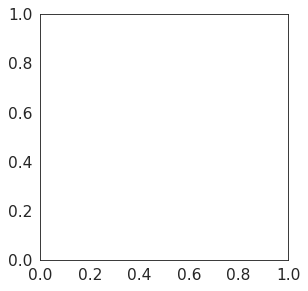

In [ ]:
fig = yasa.topoplot(bandpower.xs(3)['Delta'])

In [ ]:
sp = yasa.spindles_detect(raw, hypno=hypno_up, include=(2, 3))

In [ ]:
sp.summary()

,Start,Peak,End,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry,Stage,Channel,IdxChannel
0,656.68,656.89,657.19,0.51,58.497417,14.343549,2.184336,0.259011,11.932764,6.0,0.403846,2,EEG F4-M1,0
1,668.60,668.94,669.29,0.69,43.400090,10.051312,1.918222,0.227094,11.837696,8.0,0.485714,2,EEG F4-M1,0
2,711.25,711.90,712.13,0.88,198.379364,32.975811,2.567171,0.252683,13.651618,12.0,0.730337,2,EEG F4-M1,0
3,1562.71,1562.98,1563.54,0.83,38.873531,8.846887,1.697301,0.317517,13.724512,10.0,0.321429,2,EEG F4-M1,0
4,1588.80,1589.01,1589.35,0.55,38.517517,10.516522,2.009745,0.257007,12.001847,6.0,0.375000,2,EEG F4-M1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,25120.10,25120.35,25120.61,0.51,33.776821,7.531605,1.683858,0.350867,13.845299,6.0,0.480769,2,EEG C3-M2,3
1044,25138.74,25139.00,25139.54,0.80,28.909827,6.084818,1.531956,0.377723,13.333053,11.0,0.320988,2,EEG C3-M2,3
1045,25192.59,25192.67,25193.14,0.55,42.259570,9.087904,2.037160,0.320134,13.897590,8.0,0.142857,2,EEG C3-M2,3
1046,25195.26,25195.72,25195.89,0.63,44.876737,10.304235,2.124565,0.357184,13.811535,9.0,0.718750,2,EEG C3-M2,3


In [ ]:
sp.summary(grp_chan=True, grp_stage=True)

Count   Density  Duration  Amplitude        RMS  AbsPower  \
Stage Channel                                                                
2     EEG C3-M2    277  1.288372  0.740542  41.984763   9.454402  1.909558   
      EEG C4-M1    294  1.367442  0.761769  44.404714   9.824723  1.913385   
      EEG F4-M1    179  0.832558  0.701285  46.805821  10.496507  1.977392   
      EEG O2-M1    292  1.358140  0.750240  35.989188   7.969097  1.749318   
3     EEG C3-M2      2  0.173913  0.550000  45.825664  10.167436  1.915739   
      EEG F4-M1      1  0.086957  0.640000  49.789251  11.408644  2.043387   
      EEG O2-M1      3  0.260870  0.686667  33.226559   6.793631  1.557497   

                 RelPower  Frequency  Oscillations  Symmetry  
Stage Channel                                                 
2     EEG C3-M2  0.355081  13.397717      9.422383  0.497776  
      EEG C4-M1  0.348392  13.381770      9.744898  0.494288  
      EEG F4-M1  0.329403  12.739862      8.664804  0.519348  
      EEG O2-M1  0.363547  13.246871      9.513699  0.516606  
3     EEG C3-M2  0.252499  13.537837      7.000000  0.598214  
      EEG F4-M1  0.282390  12.368764      8.000000  0.676923  
      EEG O2-M1  0.302761  13.061121      8.333333  0.598193

/usr/local/lib/python3.10/dist-packages/yasa/detection.py:477: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_sync, x="Time", y="Amplitude", hue=hue, ax=ax, **kwargs)


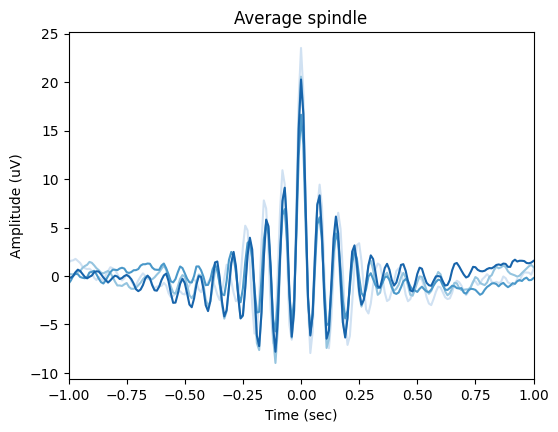

In [ ]:
# Because of the large number of channels, we disable the 95%CI and legend
sp.plot_average(ci=None, legend=False, palette="Blues");

In [ ]:
sw = yasa.sw_detect(raw, hypno=hypno_up, include=(2, 3))
sw.summary()

,Start,NegPeak,MidCrossing,PosPeak,End,Duration,ValNegPeak,ValPosPeak,PTP,Slope,Frequency,Stage,Channel,IdxChannel
0,1781.88,1782.17,1782.45,1782.69,1783.31,1.43,-49.130544,27.521239,76.651783,273.756368,0.699301,2,EEG F4-M1,0
1,1860.27,1860.62,1861.02,1861.27,1861.57,1.30,-58.475886,28.785758,87.261644,218.154110,0.769231,2,EEG F4-M1,0
2,1975.43,1975.75,1976.05,1976.32,1976.64,1.21,-51.234494,39.802334,91.036827,303.456091,0.826446,2,EEG F4-M1,0
3,2078.42,2078.86,2079.13,2079.83,2080.11,1.69,-40.625234,42.109941,82.735175,306.426575,0.591716,2,EEG F4-M1,0
4,2222.26,2222.56,2222.83,2223.07,2223.41,1.15,-54.949197,40.252724,95.201921,352.599707,0.869565,2,EEG F4-M1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,19953.51,19953.76,19954.04,19954.37,19954.68,1.17,-42.377319,38.036826,80.414144,287.193372,0.854701,2,EEG C3-M2,3
235,20583.58,20583.96,20584.23,20584.47,20584.79,1.21,-60.698900,45.295822,105.994722,392.573045,0.826446,2,EEG C3-M2,3
236,20610.82,20611.54,20611.81,20612.12,20612.79,1.97,-46.321383,51.750574,98.071957,363.229470,0.507614,2,EEG C3-M2,3
237,20619.03,20619.36,20619.61,20619.88,20620.52,1.49,-42.125553,41.899766,84.025319,336.101276,0.671141,2,EEG C3-M2,3


/usr/local/lib/python3.10/dist-packages/yasa/detection.py:477: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_sync, x="Time", y="Amplitude", hue=hue, ax=ax, **kwargs)


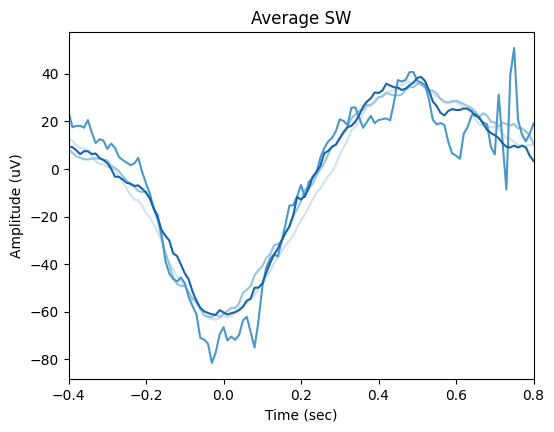

In [ ]:
sw.plot_average(ci=None, legend=False, palette="Blues");

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


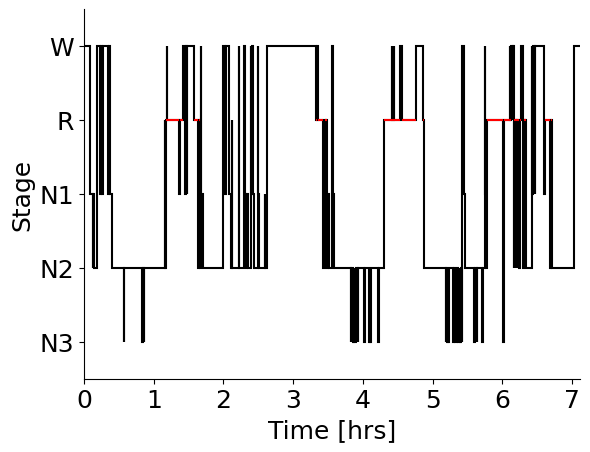

In [ ]:
# ['EEG F4-M1', 'EEG C4-M1', 'EEG O2-M1', 'EEG C3-M2']
sls = yasa.SleepStaging(raw, eeg_name='EEG F4-M1')
hypno_pred = sls.predict()  # Predict the sleep stages
hypno_pred = yasa.hypno_str_to_int(hypno_pred)  # Convert "W" to 0, "N1" to 1, etc
yasa.plot_hypnogram(hypno_pred);  # Plot

In [ ]:
hypno_pred

In [ ]:
hypno2 = np.array(hypno2)
hypno2 = hypno2[:855]

In [ ]:
print(len(hypno_pred))
print(len(hypno2))

855
855


In [ ]:
from sklearn.metrics import accuracy_score
print(f"The accuracy is {100 * accuracy_score(hypno2, hypno_pred):.3f}%")

The accuracy is 74.620%


In [ ]:
from sklearn import metrics

In [ ]:
confustion_matrics = metrics.multilabel_confusion_matrix(hypno2, hypno_pred)
classification_report = metrics.classification_report(hypno2, hypno_pred)
classification_report

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n          -2       0.00      0.00      0.00         1\n           0       0.66      0.91      0.76       151\n           1       0.60      0.24      0.34       109\n           2       0.88      0.83      0.86       430\n           3       0.21      0.30      0.25        23\n           4       0.67      0.77      0.72       141\n\n    accuracy                           0.75       855\n   macro avg       0.50      0.51      0.49       855\nweighted avg       0.75      0.75      0.73       855\n'

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


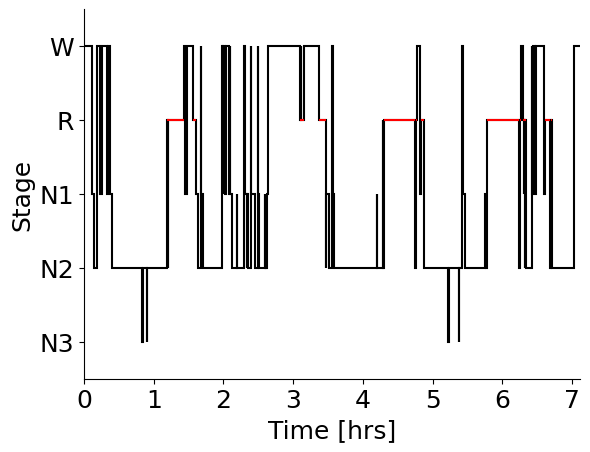

In [ ]:
# ['EEG F4-M1', 'EEG C4-M1', 'EEG O2-M1', 'EEG C3-M2']
sls = yasa.SleepStaging(raw, eeg_name='EEG C4-M1')
hypno_pred = sls.predict()  # Predict the sleep stages
hypno_pred = yasa.hypno_str_to_int(hypno_pred)  # Convert "W" to 0, "N1" to 1, etc
yasa.plot_hypnogram(hypno_pred);  # Plot

In [ ]:
from sklearn.metrics import accuracy_score
print(f"The accuracy is {100 * accuracy_score(hypno2, hypno_pred):.3f}%")

The accuracy is 78.129%


In [ ]:
confustion_matrics = metrics.multilabel_confusion_matrix(hypno2, hypno_pred)
classification_report = metrics.classification_report(hypno2, hypno_pred)
classification_report

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n          -2       0.00      0.00      0.00         1\n           0       0.74      0.86      0.80       151\n           1       0.50      0.33      0.40       109\n           2       0.90      0.87      0.88       430\n           3       0.40      0.09      0.14        23\n           4       0.68      0.89      0.77       141\n\n    accuracy                           0.78       855\n   macro avg       0.54      0.51      0.50       855\nweighted avg       0.77      0.78      0.77       855\n'

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


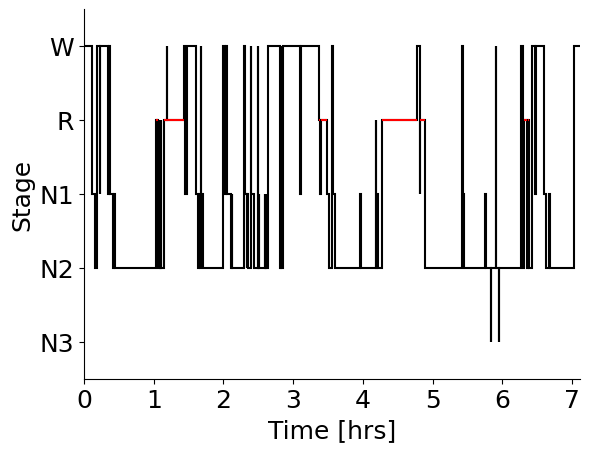

In [ ]:
# ['EEG F4-M1', 'EEG C4-M1', 'EEG O2-M1', 'EEG C3-M2']
sls = yasa.SleepStaging(raw, eeg_name='EEG O2-M1')
hypno_pred = sls.predict()  # Predict the sleep stages
hypno_pred = yasa.hypno_str_to_int(hypno_pred)  # Convert "W" to 0, "N1" to 1, etc
yasa.plot_hypnogram(hypno_pred);  # Plot

In [ ]:
from sklearn.metrics import accuracy_score
print(f"The accuracy is {100 * accuracy_score(hypno2, hypno_pred):.3f}%")

The accuracy is 70.643%


In [ ]:
confustion_matrics = metrics.multilabel_confusion_matrix(hypno2, hypno_pred)
classification_report = metrics.classification_report(hypno2, hypno_pred)
classification_report

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n          -2       0.00      0.00      0.00         1\n           0       0.72      0.89      0.80       151\n           1       0.47      0.32      0.38       109\n           2       0.78      0.84      0.81       430\n           3       0.00      0.00      0.00        23\n           4       0.57      0.51      0.54       141\n\n    accuracy                           0.71       855\n   macro avg       0.42      0.43      0.42       855\nweighted avg       0.67      0.71      0.69       855\n'

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.24.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


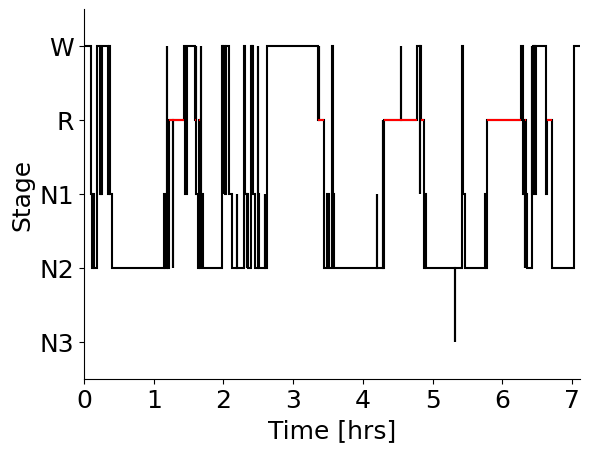

In [ ]:
# ['EEG F4-M1', 'EEG C4-M1', 'EEG O2-M1', 'EEG C3-M2']
sls = yasa.SleepStaging(raw, eeg_name='EEG C3-M2')
hypno_pred = sls.predict()  # Predict the sleep stages
hypno_pred = yasa.hypno_str_to_int(hypno_pred)  # Convert "W" to 0, "N1" to 1, etc
yasa.plot_hypnogram(hypno_pred);  # Plot

In [ ]:
from sklearn.metrics import accuracy_score
print(f"The accuracy is {100 * accuracy_score(hypno2, hypno_pred):.3f}%")

The accuracy is 79.649%


In [ ]:
confustion_matrics = metrics.multilabel_confusion_matrix(hypno2, hypno_pred)
classification_report = metrics.classification_report(hypno2, hypno_pred)
classification_report

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n          -2       0.00      0.00      0.00         1\n           0       0.73      0.95      0.82       151\n           1       0.51      0.32      0.40       109\n           2       0.89      0.87      0.88       430\n           3       0.00      0.00      0.00        23\n           4       0.76      0.90      0.82       141\n\n    accuracy                           0.80       855\n   macro avg       0.48      0.51      0.49       855\nweighted avg       0.77      0.80      0.78       855\n'